# Session 11.3 Supplemental Exercise

In this exercise, we will look at housing sales in New York and try to see:

1) What can be observed by grouping the data?
2) Which columns are the most responsible for those groupings?
3) The nature of the data vs. the groupings. 

For example, we might conclude that price was a significant factor in the groupings and that when price goes up, the grouping goes up. We might, but let's see what the data analysis shows.

In [1]:
# Import the required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os
import warnings
import matplotlib.pyplot as plt

os.environ["OMP_NUM_THREADS"] = "16"
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# Read the NY-House-Dataset.csv file from the Resources folder into a Pandas DataFrame
housing_df = pd.read_csv('./Resources/NY-House-Dataset.csv')
print(len(housing_df))
housing_df.head()

4801


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [3]:
# Filter for the rows where TYPE == "House for sale"
housing_df = housing_df.loc[housing_df["TYPE"] == "House for sale"]
# Reindex the dataframe. Note: Don't forget to do this or you won't be able to join the dataframes properly later!
housing_df = housing_df.reset_index(drop=True)
print(len(housing_df))
housing_df.head()

1012


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
1,Brokered by Sowae Corp,House for sale,690000,5,2.0,4004.0,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
2,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.0,33000.0,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424
3,Brokered by Radiant Estates LLC,House for sale,639999,3,2.0,1260.0,27 Clove Way,"Staten Island, NY 10301","27 Clove WayStaten Island, NY 10301",United States,New York,Richmond County,Staten Island,Clove Way,"27 Clove Way, Staten Island, NY 10301, USA",40.620740,-74.111436
4,Brokered by Elizabeth Marra,House for sale,750000,2,2.0,1330.0,280 Loretto St,"Staten Island, NY 10307","280 Loretto StStaten Island, NY 10307",United States,New York,Richmond County,Staten Island,Loretto Street,"280 Loretto St, Staten Island, NY 10307, USA",40.503979,-74.239655


In [4]:
# Outlier Removal
# There's a house in the dataset that has a price of over $2,000,000,000. This is an outlier and will skew the results of the analysis. Remove this row from the dataset.

# Find the max and min Price
print(housing_df["PRICE"].max()) # Over 2 Billion
print(housing_df["PRICE"].min())
print(len(housing_df))
# Filter for the rows where PRICE is less than 1,000,000,000
housing_df = housing_df.loc[housing_df["PRICE"] < 1000000000]
# reindex the dataframe
housing_df = housing_df.reset_index(drop=True)
print(len(housing_df))
print(housing_df["PRICE"].max()) # Now a measly, 56 million
housing_df.head()

2147483647
130000
1012
1011
56000000


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
1,Brokered by Sowae Corp,House for sale,690000,5,2.0,4004.0,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
2,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.0,33000.0,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424
3,Brokered by Radiant Estates LLC,House for sale,639999,3,2.0,1260.0,27 Clove Way,"Staten Island, NY 10301","27 Clove WayStaten Island, NY 10301",United States,New York,Richmond County,Staten Island,Clove Way,"27 Clove Way, Staten Island, NY 10301, USA",40.620740,-74.111436
4,Brokered by Elizabeth Marra,House for sale,750000,2,2.0,1330.0,280 Loretto St,"Staten Island, NY 10307","280 Loretto StStaten Island, NY 10307",United States,New York,Richmond County,Staten Island,Loretto Street,"280 Loretto St, Staten Island, NY 10307, USA",40.503979,-74.239655


In [5]:
# Reduce the number of columns to a manageable number by removing the extraneous columns like BROKERTITLE
housing_df = housing_df[["PRICE", "BEDS", "BATH", "PROPERTYSQFT", "STATE"]]
housing_df.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,STATE
0,260000,4,2.0,2015.0,"Staten Island, NY 10312"
1,690000,5,2.0,4004.0,"Brooklyn, NY 11238"
2,16800000,8,16.0,33000.0,"Staten Island, NY 10304"
3,639999,3,2.0,1260.0,"Staten Island, NY 10301"
4,750000,2,2.0,1330.0,"Staten Island, NY 10307"


In [6]:
# Scale the numeric columns using the StandardScaler
scale_cols = ["PRICE", "BEDS", "BATH", "PROPERTYSQFT"]
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_df[scale_cols])
print(housing_scaled[:5])
# Convert the numpy array to a dataframe
housing_scaled_df = pd.DataFrame(housing_scaled, columns=scale_cols)
housing_scaled_df.head()

[[-0.3768682   0.15314846 -0.42329792 -0.12283251]
 [-0.25256952  0.73088387 -0.42329792  0.92619004]
 [ 4.40429509  2.46409012 10.70488223 16.21902967]
 [-0.26702314 -0.42458696 -0.42329792 -0.5210286 ]
 [-0.23522552 -1.00232237 -0.42329792 -0.48410976]]


,PRICE,BEDS,BATH,PROPERTYSQFT
0,-0.376868,0.153148,-0.423298,-0.122833
1,-0.252570,0.730884,-0.423298,0.926190
2,4.404295,2.464090,10.704882,16.219030
3,-0.267023,-0.424587,-0.423298,-0.521029
4,-0.235226,-1.002322,-0.423298,-0.484110


In [7]:
# Trim off the Zip code and NY from the STATE column and rename it to CITY
city_df = pd.DataFrame()
city_df["CITY"] = housing_df["STATE"].str[0:-10]
print(city_df["CITY"].unique())

# Use getdummies on the CITY column
city_df = pd.get_dummies(city_df, columns=["CITY"], dtype=int)
city_df.head()

['Staten Island' 'Brooklyn' 'Bronx' 'New York' 'Springfield Gardens'
 'Bellerose' 'Queens' 'Howard Beach' 'Jamaica' 'Far Rockaway'
 'Cambria Heights' 'Rockaway Park' 'Bayside' 'East Elmhurst' 'Little Neck'
 'Flushing' 'Long Island City' 'Forest Hills' 'Brownville'
 'Queens Village' 'Middle Village' 'Saint Albans' 'Kensington'
 'Ozone Park' 'South Ozone Park' 'Whitestone' 'Rego Park' 'Fresh Meadows'
 'Woodside' 'Rosedale' 'College Point' 'Malba' 'Glen Oaks' 'Elmhurst'
 'Sunnyside' 'Glendale' 'Hollis' 'Richmond Hill' 'Douglaston'
 'Old Mill Basin' 'Corona' 'Maspeth' 'Bronx Ny' 'Nyc' 'Beechhurst'
 'Woodhaven' 'Kew Gardens' 'Floral Park' 'Belle Harbor' 'Manhattan'
 'East Flatbush' 'Arverne' 'Bedford Stuyvesant' 'Astoria']


,CITY_Arverne,CITY_Astoria,CITY_Bayside,CITY_Bedford Stuyvesant,CITY_Beechhurst,CITY_Belle Harbor,CITY_Bellerose,CITY_Bronx,CITY_Bronx Ny,CITY_Brooklyn,...,CITY_Rockaway Park,CITY_Rosedale,CITY_Saint Albans,CITY_South Ozone Park,CITY_Springfield Gardens,CITY_Staten Island,CITY_Sunnyside,CITY_Whitestone,CITY_Woodhaven,CITY_Woodside
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
# Join the scaled data with the categorical CITY columns
housing_scaled_city_df = housing_scaled_df.join(city_df)
housing_scaled_city_df

,PRICE,BEDS,BATH,PROPERTYSQFT,CITY_Arverne,CITY_Astoria,CITY_Bayside,CITY_Bedford Stuyvesant,CITY_Beechhurst,CITY_Belle Harbor,...,CITY_Rockaway Park,CITY_Rosedale,CITY_Saint Albans,CITY_South Ozone Park,CITY_Springfield Gardens,CITY_Staten Island,CITY_Sunnyside,CITY_Whitestone,CITY_Woodhaven,CITY_Woodside
0,-0.376868,0.153148,-0.423298,-0.122833,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.252570,0.730884,-0.423298,0.926190,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.404295,2.464090,10.704882,16.219030,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.267023,-0.424587,-0.423298,-0.521029,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.235226,-1.002322,-0.423298,-0.484110,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,-0.170186,-0.424587,-0.423298,-0.447191,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1007,-0.213285,-0.424587,-0.423298,-0.171354,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1008,-0.287547,-1.002322,-1.218168,-0.742542,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009,-0.235515,-0.424587,-0.126127,-0.129689,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

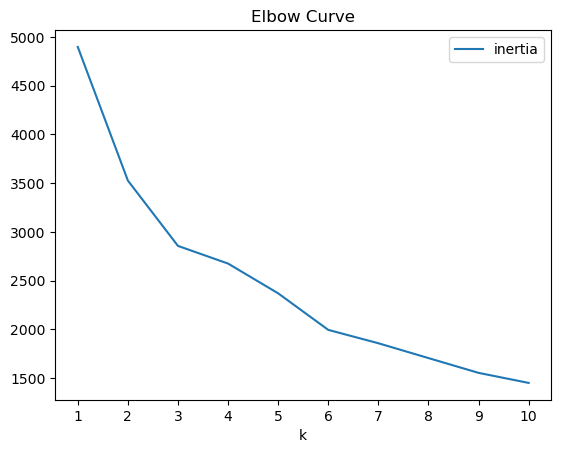

In [9]:
# run a K-means model with 1 to 10 clusters and track the inertia
inertia = []
k = list(range(1, 11))
for i in k:
    kmeans = KMeans(n_clusters=i, n_init="auto", random_state=0).fit(housing_scaled_city_df)
    inertia.append(kmeans.inertia_)

# now plot the elbow curve
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

In [10]:
# It looks like it first flattens out at 3 clusters, so let's use 3 clusters
# Now predict the clusters
kmeans = KMeans(n_clusters=3, n_init="auto", random_state=0).fit(housing_scaled_city_df)
clusters = kmeans.predict(housing_scaled_city_df)
# create a new dataframe
housing_scaled_predictions_df = housing_scaled_city_df.copy()
# add a new column with the cluster predictions
housing_scaled_predictions_df["Cluster"] = clusters
housing_scaled_predictions_df.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,CITY_Arverne,CITY_Astoria,CITY_Bayside,CITY_Bedford Stuyvesant,CITY_Beechhurst,CITY_Belle Harbor,...,CITY_Rosedale,CITY_Saint Albans,CITY_South Ozone Park,CITY_Springfield Gardens,CITY_Staten Island,CITY_Sunnyside,CITY_Whitestone,CITY_Woodhaven,CITY_Woodside,Cluster
0,-0.376868,0.153148,-0.423298,-0.122833,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,-0.252570,0.730884,-0.423298,0.926190,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4.404295,2.464090,10.704882,16.219030,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
3,-0.267023,-0.424587,-0.423298,-0.521029,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-0.235226,-1.002322,-0.423298,-0.484110,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


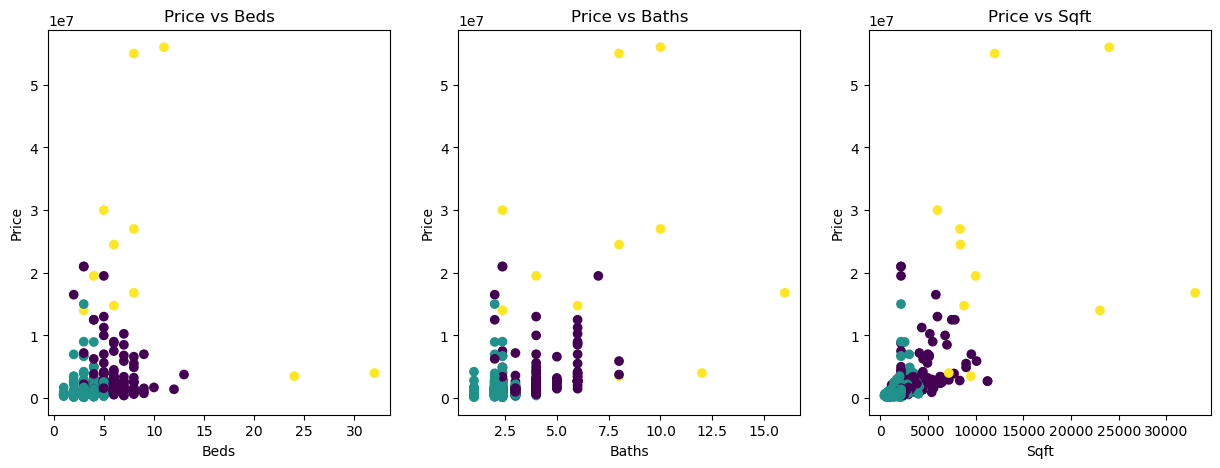

In [11]:
# For fun, let's look at price vs beds, baths, and sqft, colored by cluster
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(housing_df["BEDS"], housing_df["PRICE"], c=housing_scaled_predictions_df["Cluster"])
ax[0].set_title("Price vs Beds")
ax[0].set_xlabel("Beds")
ax[0].set_ylabel("Price")
ax[1].scatter(housing_df["BATH"], housing_df["PRICE"], c=housing_scaled_predictions_df["Cluster"])
ax[1].set_title("Price vs Baths")
ax[1].set_xlabel("Baths")
ax[1].set_ylabel("Price")
ax[2].scatter(housing_df["PROPERTYSQFT"], housing_df["PRICE"], c=housing_scaled_predictions_df["Cluster"])
ax[2].set_title("Price vs Sqft")
ax[2].set_xlabel("Sqft")
ax[2].set_ylabel("Price")
plt.show()

In [12]:
# Now let's use PCA to determine which features make the most difference in the clusters
# First, we'll try 2 components
pca = PCA(n_components=2)
housing_pca = pca.fit_transform(housing_scaled_city_df)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_[:])) 

[0.52442095 0.16733527]
0.6917562207416262


In [13]:
# 2 only explains 69.2% of the variance, so let's try 3 and see if it's any better
pca = PCA(n_components=3)
housing_pca = pca.fit_transform(housing_scaled_city_df)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_[:])) 

[0.52442095 0.16733527 0.08032128]
0.7720775015661449


In [14]:
# Now we have 3 components that explain 77.2% of the variance, so let's use that
# Create a dataframe with the PCA results
housing_pca_df = pd.DataFrame(housing_pca, columns=["PCA1", "PCA2", "PCA3"])
housing_pca_df.head()

,PCA1,PCA2,PCA3
0,-0.412091,0.258884,0.128592
1,0.468477,0.324518,-0.098460
2,17.654560,-2.833432,8.588105
3,-0.832903,-0.095835,0.150833
4,-1.056069,-0.520153,0.421657


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

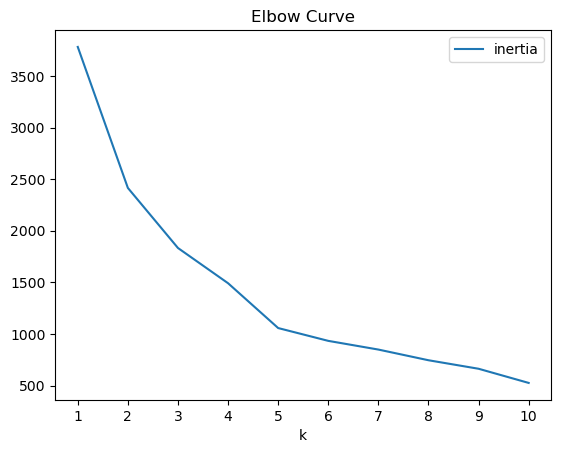

In [15]:
# Run the elbow curve again, this time on the PCA data
# Create a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Append the value of the computed inertia from the `inertia_` attribute of the K-means model instance
for i in k:
    k_model = KMeans(n_clusters=i,  n_init='auto', random_state=1)
    k_model.fit(housing_pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

# Plot the elbow curve
df_elbow.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k)

In [16]:
# This time the line breaks at 5, so let's run the model again with 5 clusters
kmeans = KMeans(n_clusters=5, n_init="auto", random_state=0).fit(housing_pca_df)
clusters = kmeans.predict(housing_pca_df)
housing_pca_predictions_df = housing_pca_df.copy()
housing_pca_predictions_df["Cluster"] = clusters
housing_pca_predictions_df.head()

,PCA1,PCA2,PCA3,Cluster
0,-0.412091,0.258884,0.128592,2
1,0.468477,0.324518,-0.098460,0
2,17.654560,-2.833432,8.588105,1
3,-0.832903,-0.095835,0.150833,2
4,-1.056069,-0.520153,0.421657,2


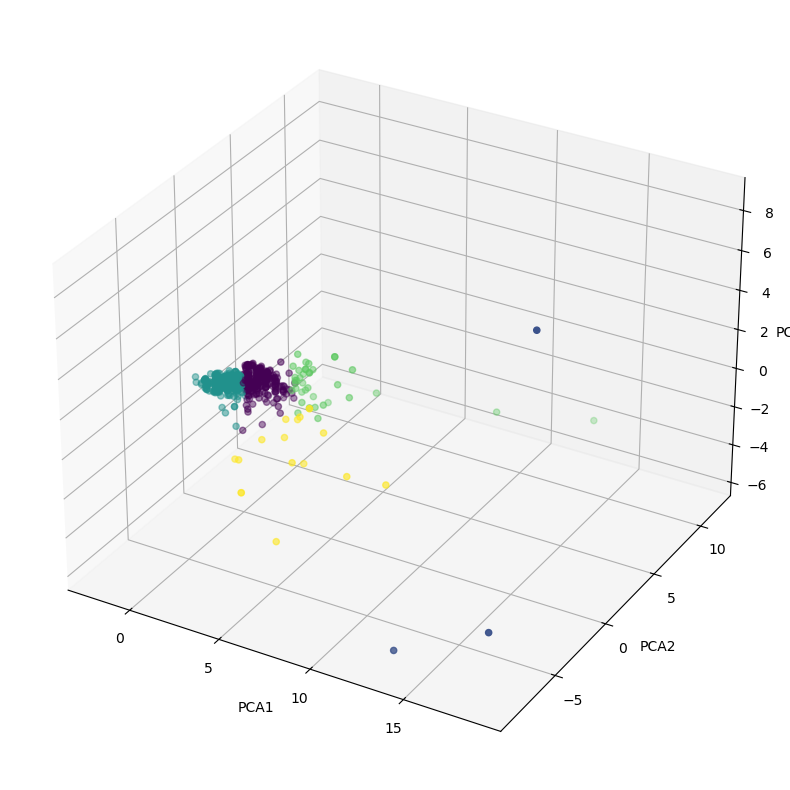

In [17]:
# now plot the clusters in a 3-d scatter plot
# Note: PCA values are not representative of the original features. They are each a combination of the variances caused by all the features.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(housing_pca_predictions_df["PCA1"],
           housing_pca_predictions_df["PCA2"],
           housing_pca_predictions_df["PCA3"],
           c=housing_pca_predictions_df["Cluster"])
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.show()

In [18]:
# Note the three navy dots in the plot. They might be considered outliers and so could be removed from the dataset to make the data more useful. But we'll leave them in for now.
# Let's look at the Component Weights to see which features are most important in each component
pca_component_weights_df = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=housing_scaled_city_df.columns)
# Sort the dataframe by the absolute value of the weights in PCA1
pca_component_weights_df["PCA1_abs"] = abs(pca_component_weights_df["PCA1"])
pca_component_weights_df.sort_values(by="PCA1_abs", ascending=False, inplace=True)
pca_component_weights_df

,PCA1,PCA2,PCA3,PCA1_abs
BATH,0.543374,0.248857,0.403513,0.543374
PROPERTYSQFT,0.537176,-0.272178,0.471698,0.537176
PRICE,0.462364,-0.625633,-0.555306,0.462364
BEDS,0.446051,0.682624,-0.469189,0.446051
CITY_New York,0.053068,-0.070296,-0.090548,0.053068
CITY_Staten Island,-0.016733,-0.002921,0.239023,0.016733
CITY_Brooklyn,-0.014846,0.031623,-0.142760,0.014846
CITY_Bronx,-0.006909,0.018094,-0.005436,0.006909
CITY_Middle Village,-0.003414,-0.005459,0.001950,0.003414
CITY_Malba,0.002878,-0.000074,0.008876,0.002878


In [19]:
# filter weights where absolute value is greater than 0.2
pca_component_weights1_df = pca_component_weights_df[(pca_component_weights_df['PCA1'] > 0.2) | (pca_component_weights_df['PCA1'] < -0.2)][["PCA1"]]
pca_component_weights1_df

,PCA1
BATH,0.543374
PROPERTYSQFT,0.537176
PRICE,0.462364
BEDS,0.446051


In [20]:
# That's interesting, all 4 features contribute almost equally to the groupings in PCA1. Let's look at PCA2
pca_component_weights2_df = pca_component_weights_df[(pca_component_weights_df['PCA2'] > 0.2) | (pca_component_weights_df['PCA2'] < -0.2)][["PCA2"]]
pca_component_weights2_df

,PCA2
BATH,0.248857
PROPERTYSQFT,-0.272178
PRICE,-0.625633
BEDS,0.682624


In [21]:
# See how Price and SqFt are inversely contributing to the PCA2? So as PCA2 goes up, PRICE and SQFT go down. That's interesting too. Let's look at PCA3
pca_component_weights3_df = pca_component_weights_df[(pca_component_weights_df['PCA3'] > 0.2) | (pca_component_weights_df['PCA3'] < -0.2)][["PCA3"]]
pca_component_weights3_df

,PCA3
BATH,0.403513
PROPERTYSQFT,0.471698
PRICE,-0.555306
BEDS,-0.469189
CITY_Staten Island,0.239023


In [22]:
# Now Price and Beds are inversely contributing to PCA3, and Staten Island shows up here too. I wonder if the high-priced Staten Island homes are the thre Navy dots?
# Let's look at the clusters and see
# housing_pca_predictions_df has the PCA values and the cluster predictions
# housing_df has the original data
# We can join them:
housing_df = housing_df.join(housing_pca_predictions_df)
housing_df.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,PCA1,PCA2,PCA3,Cluster
0,260000,4,2.0,2015.0,"Staten Island, NY 10312",-0.412091,0.258884,0.128592,2
1,690000,5,2.0,4004.0,"Brooklyn, NY 11238",0.468477,0.324518,-0.098460,0
2,16800000,8,16.0,33000.0,"Staten Island, NY 10304",17.654560,-2.833432,8.588105,1
3,639999,3,2.0,1260.0,"Staten Island, NY 10301",-0.832903,-0.095835,0.150833,2
4,750000,2,2.0,1330.0,"Staten Island, NY 10307",-1.056069,-0.520153,0.421657,2


In [23]:
# Sort by Cluster
housing_df.sort_values(by="Cluster", inplace=True)
housing_df

,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,PCA1,PCA2,PCA3,Cluster
576,2700000,5,2.0,2690.000000,"Brooklyn, NY 11235",0.364849,0.149634,-0.748002,0
440,1075000,6,2.0,2200.000000,"Brooklyn, NY 11230",0.266537,0.908230,-0.880125,0
442,4995000,4,4.0,2184.207862,"Brooklyn, NY 11215",1.134411,-0.191568,-0.329679,0
443,898000,5,4.0,2828.000000,"Brooklyn, NY 11207",1.026924,0.851333,0.217068,0
444,1749999,4,4.0,2600.000000,"Staten Island, NY 10304",0.816615,0.301059,0.676433,0
...,...,...,...,...,...,...,...,...,...
526,12495000,4,2.0,7825.000000,"New York, NY 10028",2.939017,-2.855213,-0.719538,4
855,19500000,5,7.0,2184.207862,"New York, NY 10028",4.694412,-1.928911,-1.914661,4
249,16500000,2,2.0,5834.000000,"New York, NY 10011",2.394826,-4.082460,-1.315608,4
498,19499999,4,4.0,10000.000000,"New York, NY 10013",5.355292,-4.038668,-0.661408,4


In [24]:
# count the number of homes in each cluster and the average price, beds, baths, and sqft
cluster_summary_df = housing_df.groupby("Cluster").agg({"PRICE": ["count", "mean"],
                                                        "BEDS": ["mean"],
                                                        "BATH": ["mean"],
                                                        "PROPERTYSQFT": ["mean"]})
cluster_summary_df

PRICE                    BEDS       BATH  PROPERTYSQFT
        count          mean      mean       mean          mean
Cluster                                                       
0         268  1.573288e+06  4.675373   3.367906   2545.710862
1           3  4.260000e+07  9.000000  11.333333  23000.000000
2         686  8.801875e+05  3.080175   1.948328   1735.404264
3          38  3.834278e+06  8.210526   5.703887   5769.891336
4          16  1.762437e+07  4.437500   4.405965   6976.864465

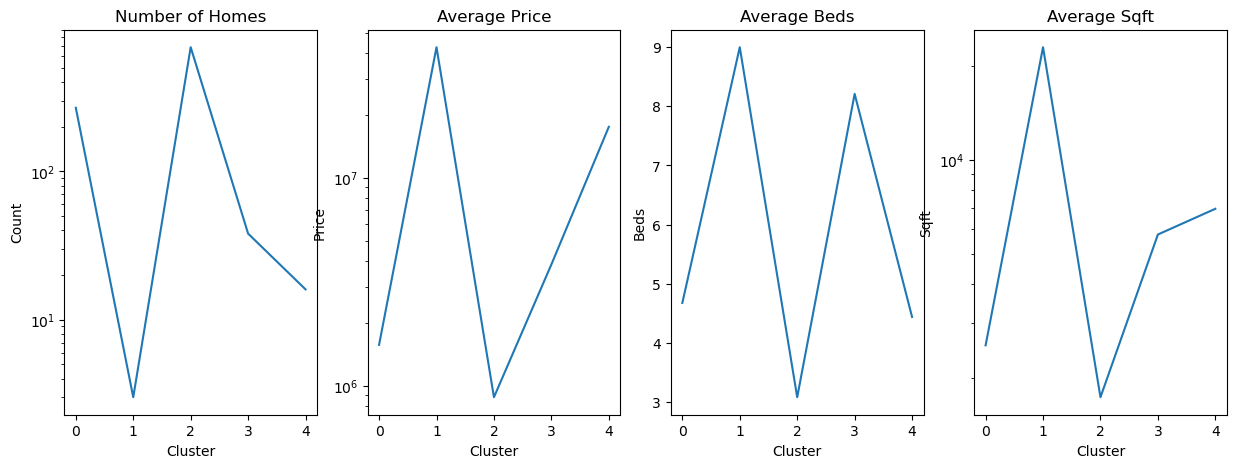

In [25]:
# Now plot the cluster summary as lines on a logorithmic scale
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].plot(cluster_summary_df["PRICE"]["count"])
ax[0].set_title("Number of Homes")
ax[0].set_xlabel("Cluster")
ax[0].set_ylabel("Count")
ax[0].set_yscale("log")
ax[1].plot(cluster_summary_df["PRICE"]["mean"])
ax[1].set_title("Average Price")
ax[1].set_xlabel("Cluster")
ax[1].set_ylabel("Price")
ax[1].set_yscale("log")
ax[2].plot(cluster_summary_df["BEDS"]["mean"])
ax[2].set_title("Average Beds")
ax[2].set_xlabel("Cluster")
ax[2].set_ylabel("Beds")
ax[3].plot(cluster_summary_df["PROPERTYSQFT"]["mean"])
ax[3].set_title("Average Sqft")
ax[3].set_xlabel("Cluster")
ax[3].set_ylabel("Sqft")
ax[3].set_yscale("log")
plt.show()